In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit, regexp_extract
import os

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Wind Turbine Fault Detection") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.instances", "2") \
    .config("spark.executor.cores", "2") \
    .getOrCreate()

# EDA

## Events

In [ ]:
eventinfo_A = spark.read.csv('/content/drive/MyDrive/Wind Farm A/comma_event_info.csv', header=True, inferSchema=True)
eventinfo_B = spark.read.csv('/content/drive/MyDrive/Wind Farm B/comma_event_info.csv', header=True, inferSchema=True)
eventinfo_C =spark.read.csv('/content/drive/MyDrive/Wind Farm C/comma_event_info.csv', header=True, inferSchema=True)

In [ ]:
def event_ids(df):
  collected_event_ids = df.select("event_id").distinct().collect()
  event_ids = sorted([row.event_id for row in collected_event_ids])
  return event_ids

In [ ]:
a_events = event_ids(eventinfo_A)
b_events = event_ids(eventinfo_B)
c_events = event_ids(eventinfo_C)

print(f"Wind Farm A has {len(a_events)} events: {a_events}")
print(f"Wind Farm B has {len(b_events)} events: {b_events}")
print(f"Wind Farm C has {len(c_events)} events: {c_events}")

Wind Farm A has 22 events: [0, 3, 10, 13, 14, 17, 22, 24, 25, 26, 38, 40, 42, 45, 51, 68, 69, 71, 72, 73, 84, 92]
Wind Farm B has 15 events: [2, 7, 19, 21, 23, 27, 34, 52, 53, 74, 77, 82, 83, 86, 87]
Wind Farm C has 58 events: [1, 4, 5, 6, 8, 9, 11, 12, 15, 16, 18, 20, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39, 41, 43, 44, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 70, 75, 76, 78, 79, 80, 81, 85, 88, 89, 90, 91, 93, 94]


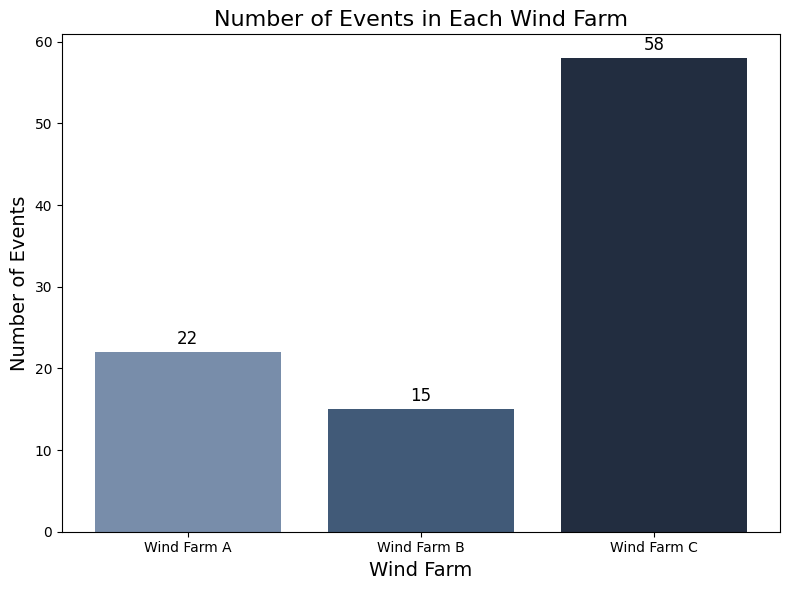

In [ ]:
import matplotlib.pyplot as plt

# Data
wind_farms = ['Wind Farm A', 'Wind Farm B', 'Wind Farm C']
num_events = [len(a_events), len(b_events), len(c_events)]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(wind_farms, num_events, color=['#788daa', '#415a78', '#222d40'])

# Add titles and labels
plt.title('Number of Events in Each Wind Farm', fontsize=16)
plt.xlabel('Wind Farm', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)

# Add the actual numbers on top of the bars
for i, value in enumerate(num_events):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

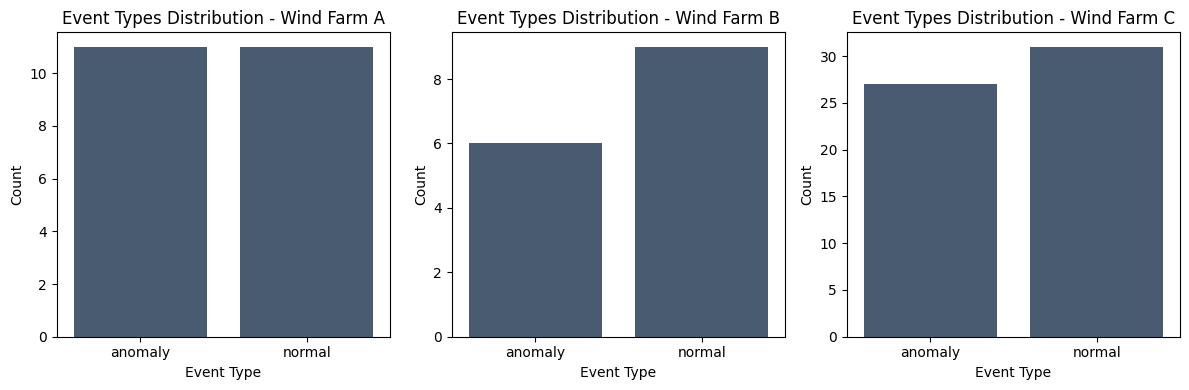

In [ ]:
# Create a figure with 1 row and 3 columns for side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot for Wind Farm A
sns.countplot(x="event_label", data=eventinfo_A.toPandas(), ax=axes[0], color="#415a78")
axes[0].set_title("Event Types Distribution - Wind Farm A")
axes[0].set_xlabel("Event Type")
axes[0].set_ylabel("Count")

# Plot for Wind Farm B
sns.countplot(x="event_label", data=eventinfo_B.toPandas(), ax=axes[1], color="#415a78")
axes[1].set_title("Event Types Distribution - Wind Farm B")
axes[1].set_xlabel("Event Type")
axes[1].set_ylabel("Count")

# Plot for Wind Farm C
sns.countplot(x="event_label", data=eventinfo_C.toPandas(), ax=axes[2], color="#415a78")
axes[2].set_title("Event Types Distribution - Wind Farm C")
axes[2].set_xlabel("Event Type")
axes[2].set_ylabel("Count")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
eventinfo_A.groupBy("event_label").count().show()

+-----------+-----+
|event_label|count|
+-----------+-----+
|     normal|   11|
|    anomaly|   11|
+-----------+-----+



In [ ]:
eventinfo_B.groupBy("event_label").count().show()

+-----------+-----+
|event_label|count|
+-----------+-----+
|     normal|    9|
|    anomaly|    6|
+-----------+-----+



In [ ]:
eventinfo_C.groupBy("event_label").count().show()

+-----------+-----+
|event_label|count|
+-----------+-----+
|     normal|   31|
|    anomaly|   27|
+-----------+-----+



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['A', 'B', 'C']
normal_counts = [11, 9, 31]  # Normal events for A, B, C
anomaly_counts = [11, 6, 27]  # Anomaly events for A, B, C

# Position of bars on the x-axis
x = np.arange(len(labels))

# Width of the bars
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, normal_counts, width, label='Normal', color='#415a78')  # Normal bars
plt.bar(x + width/2, anomaly_counts, width, label='Anomaly', color='#788daa')  # Anomaly bars

# Add labels, title, and legend
plt.xlabel('Windfarm', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Normal and Anomaly Event Types Across Windfarms', fontsize=16)
plt.xticks(x, labels, fontsize=8)
plt.legend(fontsize=8)

# Add counts on top of the bars
for i in range(len(labels)):
    plt.text(x[i] - width/2, normal_counts[i] + 10000, str(normal_counts[i]), ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + width/2, anomaly_counts[i] + 10000, str(anomaly_counts[i]), ha='center', va='bottom', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-149-b48fbe394a94>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


## Sensors

In [ ]:
sensors_A = spark.read.csv('/content/drive/MyDrive/Wind Farm A/comma_feature_description.csv', header=True, inferSchema=True, encoding="utf-8")
sensors_B = spark.read.csv('/content/drive/MyDrive/Wind Farm B/comma_feature_description.csv', header=True, inferSchema=True, encoding="utf-8")
sensors_C =spark.read.csv('/content/drive/MyDrive/Wind Farm C/comma_feature_description.csv', header=True, inferSchema=True, encoding="utf-8")

In [ ]:
sensors_A.show()

+------------+--------------------+--------------------+----+--------+----------+
| sensor_name|     statistics_type|         description|unit|is_angle|is_counter|
+------------+--------------------+--------------------+----+--------+----------+
|    sensor_0|             average| Ambient temperature|  �C|   false|     false|
|    sensor_1|             average|Wind absolute dir...|   �|    true|     false|
|    sensor_2|             average|Wind relative dir...|   �|    true|     false|
|wind_speed_3|maximum,minimum,a...|           Windspeed| m/s|   false|     false|
|wind_speed_4|             average| Estimated windspeed| m/s|   false|     false|
|    sensor_5|maximum,minimum,s...|         Pitch angle|   �|    true|     false|
|    sensor_6|             average|Temperature in th...|  �C|   false|     false|
|    sensor_7|             average|Temperature in th...|  �C|   false|     false|
|    sensor_8|             average|Temperature in th...|  �C|   false|     false|
|    sensor_9|  

In [ ]:
def sensor_types(df):
  collected_sensors = df.select("sensor_name").distinct().collect()
  sensors = sorted([row.sensor_name for row in collected_sensors])
  return sensors

In [ ]:
a_sensors = sensor_types(sensors_A)
b_sensors = sensor_types(sensors_B)
c_sensors = sensor_types(sensors_C)

print(f"Wind Farm A has {len(a_sensors)} sensor types: {a_sensors}")
print(f"Wind Farm B has {len(b_sensors)} sensor types: {b_sensors}")
print(f"Wind Farm C has {len(c_sensors)} sensor types: {c_sensors}")

Wind Farm A has 54 events: ['power_29', 'power_30', 'reactive_power_27', 'reactive_power_28', 'sensor_0', 'sensor_1', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_2', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_5', 'sensor_50', 'sensor_51', 'sensor_52', 'sensor_53', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'wind_speed_3', 'wind_speed_4']
Wind Farm B has 63 events: ['power_58', 'power_62', 'reactive_power_11', 'sensor_0', 'sensor_1', 'sensor_10', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_2', 'sensor_20', 'sensor_21', 'senso

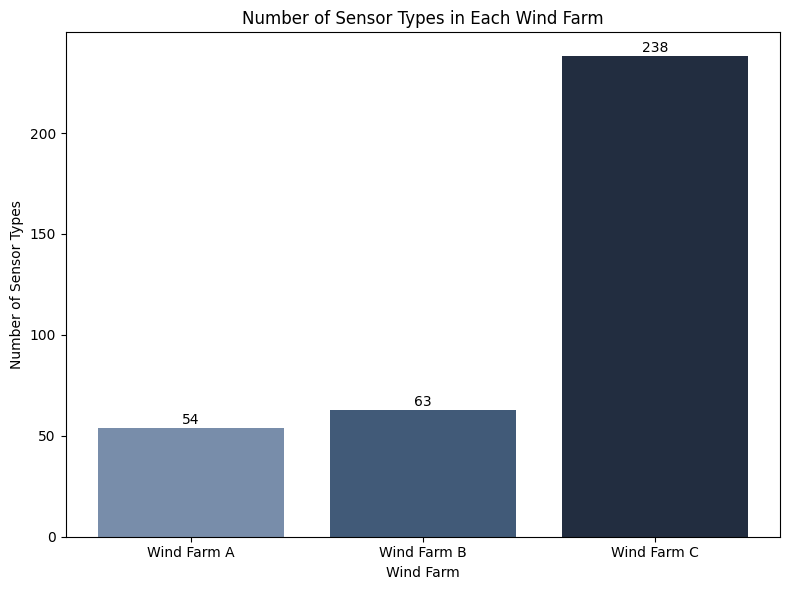

In [ ]:
import matplotlib.pyplot as plt

# Data
wind_farms = ['Wind Farm A', 'Wind Farm B', 'Wind Farm C']
num_events = [len(a_sensors), len(b_sensors), len(c_sensors)]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(wind_farms, num_events, color=['#788daa', '#415a78', '#222d40'])

# Add titles and labels
plt.title('Number of Sensor Types in Each Wind Farm', fontsize=12)
plt.xlabel('Wind Farm', fontsize=10)
plt.ylabel('Number of Sensor Types', fontsize=10)

# Add the actual numbers on top of the bars
for i, value in enumerate(num_events):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

## comma_events

In [ ]:
datasets_A = spark.read.csv('/content/drive/MyDrive/wind_farm_a_joined.csv/part-00000-2aa1a972-8e27-42b6-8075-6519aa0afc78-c000.csv', header=True, inferSchema=True)
datasets_B = spark.read.csv('/content/drive/MyDrive/wind_farm_b_joined.csv/part-00000-65e3d4a4-60e1-4386-a644-7a92b0634fbd-c000.csv', header=True, inferSchema=True, encoding="utf-8")
datasets_c =spark.read.csv('/content/drive/MyDrive/wind_farm_c_joined.csv', header=True, inferSchema=True, encoding="utf-8")

In [ ]:
datasets_A.show()

+--------+-------------------+--------+---+----------+--------------+------------+------------+-------------------+------------------+------------------+----------------+------------------+------------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+--------------------+------------------+------------+-----------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------+-------------+-------------+-------------+------

In [ ]:
datasets_A.groupBy("event_label").count().show()

+-----------+------+
|event_label| count|
+-----------+------+
|     normal|601394|
|    anomaly|595353|
+-----------+------+



In [ ]:
datasets_B.groupBy("event_label").count().show()

+-----------+------+
|event_label| count|
+-----------+------+
|     normal|505688|
|    anomaly|353377|
+-----------+------+



In [ ]:
datasets_c.groupBy("event_label").count().show()

+-----------+------+
|event_label| count|
+-----------+------+
|     normal|162435|
|    anomaly|385422|
+-----------+------+



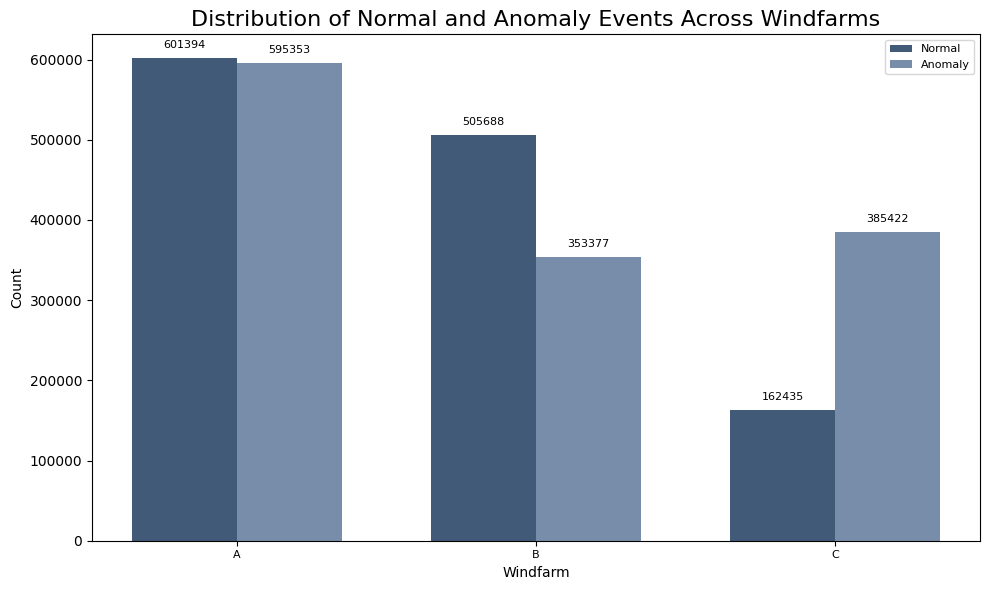

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['A', 'B', 'C']
normal_counts = [601394, 505688, 162435]  # Normal events for A, B, C
anomaly_counts = [595353, 353377, 385422]  # Anomaly events for A, B, C

# Position of bars on the x-axis
x = np.arange(len(labels))

# Width of the bars
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, normal_counts, width, label='Normal', color='#415a78')  # Normal bars
plt.bar(x + width/2, anomaly_counts, width, label='Anomaly', color='#788daa')  # Anomaly bars

# Add labels, title, and legend
plt.xlabel('Windfarm', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Normal and Anomaly Events Across Windfarms', fontsize=16)
plt.xticks(x, labels, fontsize=8)
plt.legend(fontsize=8)

# Add counts on top of the bars
for i in range(len(labels)):
    plt.text(x[i] - width/2, normal_counts[i] + 10000, str(normal_counts[i]), ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + width/2, anomaly_counts[i] + 10000, str(anomaly_counts[i]), ha='center', va='bottom', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()